## Atividade Avaliativa 1.2 -- Classificando a Idade do Abalone

O Abalone é um gênero (_Haliotis_) de um moluscos gastrópodes marinhos da família _Haliotidae_. Foi identificado por Linnaeus em 1758 e suas diversas espécies podem ser encontradas em águas costeiras de quase todo o mundo. É usado na indústria alimentícia e em itens decorativos, tais como jóias ou instrumentos musicais [1](https://pt.wikipedia.org/wiki/Abalone). A idade do abalone pode ser obtida diretamente a partir de medidas físicas, porém é necessário cortar a concha, efetuar um processo de pigmentação, e então contar o número de anéis por meio de um microscópio -- tarefa considerada monótona e custosa [2](https://archive.ics.uci.edu/ml/datasets/Abalone).

Outras medidas do Abalone, entretanto, são mais fáceis de obter, não danificam a concha e podem ser utilizadas para estimar a idade com um modelo inteligente por meio de um processo de Aprendizado Supervisionado. Esse é o objetivo do presente projeto prático.

Base de dados original: https://archive.ics.uci.edu/ml/datasets/Abalone  
Base de dados preparada: abalone.csv (Disponível no Google Classroom)

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
import seaborn as sns

## Parte 1 - Análise e Exploração de Dados

### Abertura do Dataset
Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos. Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [3]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


### Conhecendo o dataset

Para praticar conceitos relativos à exploração do conjunto de dados, utilize as células a seguir para prover respostas para cada uma das respostas elencadas

#### Quantos exemplos há no dataset?

In [4]:
print(f"Há {df.shape[0]} exemplos no dataset")

Há 4176 exemplos no dataset


#### Quais os atributos existentes no dataset e seu tipo?

In [5]:
df.info(memory_usage=False, show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Sex             object 
 1   Length          float64
 2   Diameter        float64
 3   Height          float64
 4   Whole weight    float64
 5   Shucked weight  float64
 6   Viscera weight  float64
 7   Shell weight    float64
 8   Age             int64  
dtypes: float64(7), int64(1), object(1)

#### Quantos a idade do abalone mais velho presente na base de dados? Quais seus atributos?

In [6]:
df.loc[df['Age'].idxmax()]

Sex                    F
Length               0.7
Diameter           0.585
Height             0.185
Whole weight      1.8075
Shucked weight    0.7055
Viscera weight    0.3215
Shell weight       0.475
Age                   29
Name: 479, dtype: object

#### Histograma das idades

O histograma é um gráfico que mostra as frequências de uma determinada informação. No nosso caso, vamos construir um histograma que mostra as idades dos abalones. Vamos agrupar as idades em dez bins (caixas).

Ao ler o gráfico, veremos dez barras (bins). Elas sintetizam quantos abalones daquela faixa de idade existem no dataset. Os bins são partições do total de valores em 10 partes de mesmo tamanho.

Documentação completa disponível em: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


<Axes: >

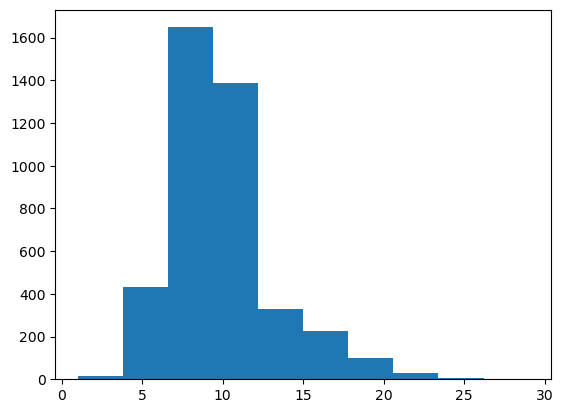

In [52]:
df.Age.hist(bins=10, grid=False)

#### Boxplot das idades 

Como é a distribuição dos valores das idades dos abalones? O gráfico boxplot pode nos ajudar nesta questão.

O boxplot ilustra informações importantes:
- Mediana
- Limite inferior (menor valor)
- Limite superior (maior valor)
- Q1 (primeiro quartil, 25% dos dados)
- Q3 (terceiro quartil, 75% dos dados)
- Outliers (se houver)

A distribuição dos exemplos no dataset é simétrica no tocante à idade? Elabore um parágrafo que justifique as conclusões obtidas a partir da análise do boxplot.

Documentação completa disponível em: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

<Axes: >

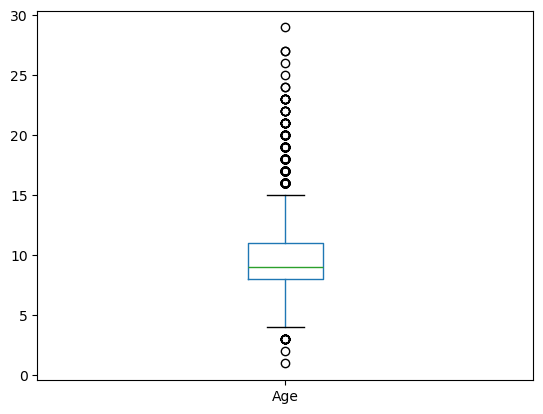

In [53]:
df.boxplot(column='Age', grid=False)

#### Há dados faltantes no dataset? 

Dados faltantes (NaN) indicam que durante a coleta e elaboração da base de dados tais informações não estavam disponíveis. Trabalhar com dados faltantes acaba por limitar as nossas análises. Se há dados suficientes, podemos eliminar os dados faltantes. Se há poucos dados, pode-se buscar estratégias para substituir os dados faltantes.

Atividades:

A. Eliminar os dados faltantes.  
B. Quantos exemplos permaneceram no dataset?

In [ ]:
df.isna().sum()

In [ ]:
df.isnull().sum()

#### Sexo do Abalone

Conforme a documentação da base de dados, há três valores possíveis para o sexo do abalone, são elas:  
    - M: Masculino  
    - F: Feminino  
    - I: Infantil (ainda não definido)  
    
Tal como dispostas, segundo strings, essas informações não ajudam modelos que lidam apenas com dados numéricos. É necessário efetuar uma codificação para representar tais valores. Assim, codifique a coluna sexo conforme a abordagem One-Hot Encoding e elimine a coluna original do dataset.

Referências:
- https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [7]:
# Criando e aplicando o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[['Sex']])

# Convertendo para DataFrame com os nomes das categorias
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Sex']))
df_encoded.head()

,Sex_F,Sex_I,Sex_M
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [8]:
# Gerando um novo DataFrame substituindo os dados categóricos por dados numéricos
df_final = df.drop(columns=['Sex']).join(df_encoded)
df_final.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0.0,1.0,0.0


## Parte 2 - Tarefa de Aprendizado de Máquina

Abordaremos o problema da previsão de idade como uma tarefa de classificação multiclasse. Embora uma tarefa de regressão pareça mais intuitiva nesse cenário, justificativas práticas motivam tal escolha, tal como a comparação com resultados já existentes na liiteratura.

#### Preparação dos dados para Validação Cruzada Holdout

- Vamos separar o atributo alvo (Age) dos atributores preditores. 
  - Atributos preditores devem ser armazenados em uma variável denominada X  
  - Atributo alvo deve ser armazenado em uma variável denominada y
- Qual o tipo de entrada do modelo?
- Vamos efetuar uma partição do tipo holdout 70/30

Documentação completa disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
y = df_final["Age"]
X = df_final.drop(columns=["Age"])

print(f"Formato de X: {X.shape}")
print(f"Formato de y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print(f" testeX:{X_test.shape} treinoX:{X_train.shape} testey:{y_test.shape} treinoy:{y_train.shape} ")

Formato de X: (4176, 10)
Formato de y: (4176,)
 testeX:(1253, 10) treinoX:(2923, 10) testey:(1253,) treinoy:(2923,) 
9


<font color="yellow">Inicialmente, separamos a coluna de idades na variável y pois ela é nosso atributo alvo e salvamos a tabela original, porém agora sem a coluna de idade, na variável X que armazena os atributos preditores. 

a função train_test_split realiza a diivsão do conjunto entre dados de treinamento e teste de forma aleatória e, de acordo com a variável test_size, define a porcentagem de dados que serão usados para a fase de teste do modelo (no caso, 30%). </font>

#### Treinar um modelo de regressão logística para o problema

A Regressão Logística é uma técnica de Aprendizado de Máquina que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas.

1. Importe o modelo da biblioteca sklearn
2. Instancie o modelo com parâmetros padrão (default)
3. Execute o algoritmo de treinamento com os dados de treino

Documentação completa disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\arkade\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<font color="yellow">Definimos nosso modelo como um modelo de regressão logistica e utilizamos a função .fit() para treiná-lo com a porção de dados de treino separada anteriormente. </font>

#### Obtendo previsões do modelo

1. Selecione um exemplo arbitrário da partição de teste
2. Forneça os atributos preditores e obtenha a previsão da idade
3. O modelo previu a idade corretamente?

In [18]:
results = model.predict(X_test)
print(results)

model.score(X,y)

[10  9  9 ...  8 10 11]


0.2638888888888889

<font color="yellow">A função predict() gera uma simulação do modelo atuando sobre os dados de teste separados anteriormente. O resultado dessa predição é armazenado na variável results e, após isso, podemos utilizar a função score() para avaliar o desempenho do modelo em relação aos resultados obtidos </font>

#### Avalie o modelo perante o conjunto de testes

1. Obtenha a acurácia, precisão, revocação e F_1 score
  * Efetue a importação de tais métricas a partir do pacote sklearn.metrics
  * Para fins de simplificação, considere os dados balanceados
2. Elabore uma visualização da matriz de confusão para as previsões do conjunto de testes
3. O modelo é bom para o problema? Justifique sua afirmação.

In [89]:
acuracia = accuracy_score(results, y_test)
print("Acuracia: ", acuracia*100, " %")

# y_true = np.array(y_test)
# res_true = np.array(results)
# y_true
# conf_matrix = confusion_matrix(y_test, results)
# conf_matrix
# print(classification_report(y_test, results))
cm = confusion_matrix(y_true, res_true)
print(classification_report(y_test, results))



Acuracia:  27.294493216280923  %
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        19
           5       0.25      0.08      0.12        38
           6       0.28      0.24      0.26        87
           7       0.32      0.55      0.40       110
           8       0.36      0.32      0.34       177
           9       0.26      0.47      0.33       200
          10       0.23      0.38      0.28       191
          11       0.27      0.24      0.25       151
          12       0.00      0.00      0.00        74
          13       0.00      0.00      0.00        51
          14       0.00      0.00      0.00        35
          15       0.00      0.00      0.00        30
          16       0.00      0.00      0.00        18
          17       0.00      0.00      0.00        20
          18       0.00      0.00      0.00     

c:\Users\arkade\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arkade\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arkade\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<font color="yellow"> A bilbioteca sklearning oferece métricas de precisão dos resultados obtidos</font>

#### Treinar um modelo de K-Vizinhos Mais Próximos

É um algoritmo de Aprendizado de Máquina que baseia-se na média dos valores dos k vizinhos mais próximos a uma dada entrada para produzir uma estimativa para o atributo-alvo. É considerado "preguiçoso", mas muito mostra-se vantajoso por possuir um baixo custo computacional.

1. Efetue o treinamento do K-Vizinhos mais Próximos, considerando k = 5
2. Efetue o teste no modelo e obtenha as métricas de desempenho previamente indicadas.  
3. Comparando com o modelo anterior, qual deles teve melhor desempenho perante o problema? Justifique.

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
knn_results = knn.predict(X_test)
knn_results

accuracy = accuracy_score(y_test, knn_results)
print(f"Acurácia: {accuracy:.2f}")



Acurácia: 0.23


In [ ]:
cm = confusion_matrix(y_test, knn_results)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação
print(classification_report(y_test, knn_results))

#### Argumente

Qual o grau de dificuldade da tarefa de aprendizado em questão? Justifique a partir dos elementos e resultados obtidos nas células anteriores.